# **Project Name**    - Book Recommendation System



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1**   - Deepak Singh Bisht

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [233]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [234]:
def convert_publishing_year(x):
    try:
        return pd.to_datetime(x, format= "%Y")
    except ValueError:
        return None

In [235]:
books_df= pd.read_csv("/kaggle/input/book-recommendation-dataset/Books.csv", converters= {"Year-Of-Publication": convert_publishing_year})#.dropna()
ratings_df= pd.read_csv("/kaggle/input/book-recommendation-dataset/Ratings.csv")#.dropna()
users_df= pd.read_csv("/kaggle/input/book-recommendation-dataset/Users.csv")

### Dataset First View

In [236]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002-01-01,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001-01-01,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991-01-01,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999-01-01,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999-01-01,W. W. Norton &amp; Company


In [237]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [238]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


#### Renaming Columns

In [239]:
def rename_cols(X):
    X.columns= X.columns.str.lower().str.split("-").map(lambda x: x[0] if x[0]== "year" else x[-1])
    return X

In [240]:
books_df= rename_cols(books_df)
ratings_df= rename_cols(ratings_df)
users_df= rename_cols(users_df)

In [241]:
books_df

,isbn,title,author,year,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002-01-01,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001-01-01,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991-01-01,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999-01-01,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999-01-01,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988-01-01,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991-01-01,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004-01-01,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996-01-01,Oxford University Press


### Dataset Rows & Columns count

In [242]:
print("Shape of")
print(f"books_df: {books_df.shape}")
print(f"ratings_df: {ratings_df.shape}")
print(f"users_df: {users_df.shape}")

Shape of
books_df: (271360, 5)
ratings_df: (1149780, 3)
users_df: (278858, 3)


### Dataset Information

In [243]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   isbn       271360 non-null  object        
 1   title      271360 non-null  object        
 2   author     271358 non-null  object        
 3   year       266737 non-null  datetime64[ns]
 4   publisher  271358 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 10.4+ MB


In [244]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   id      1149780 non-null  int64 
 1   isbn    1149780 non-null  object
 2   rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [245]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        278858 non-null  int64  
 1   location  278858 non-null  object 
 2   age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


#### Duplicate Values

In [246]:
print("Number of Duplicated rows in ")
print(f"books_df: {books_df.duplicated().sum()}")
print(f"ratings_df: {ratings_df.duplicated().sum()}")
print(f"users_df: {users_df.duplicated().sum()}")

Number of Duplicated rows in 
books_df: 0
ratings_df: 0
users_df: 0


#### Missing Values/Null Values

In [247]:
print("Number of Missing Values in ")
print(f"books_df:\n{books_df.isnull().sum()}")
print(f"ratings_df:\n{ratings_df.isnull().sum()}")
print(f"users_df:\n{users_df.isnull().sum()}")

Number of Missing Values in 
books_df:
isbn            0
title           0
author          2
year         4623
publisher       2
dtype: int64
ratings_df:
id        0
isbn      0
rating    0
dtype: int64
users_df:
id               0
location         0
age         110762
dtype: int64


### What did you know about your dataset?

None of the three dataframes that we'll be working with has any duplicate values. 
As for null values, user_df has none, where as books_df has a few null values in author, year and publisher, which are minimal compared to the overall data, so they can be removed w/o any significant loss of data. ratings_df has 110762 null values in age. 

## ***2. Understanding Your Variables***

In [248]:
print("Variables in ")
print(f"books_df:\n{books_df.columns.tolist()}")
print(f"ratings_df:\n{ratings_df.columns.tolist()}")
print(f"users_df:\n{users_df.columns.tolist()}")

Variables in 
books_df:
['isbn', 'title', 'author', 'year', 'publisher']
ratings_df:
['id', 'isbn', 'rating']
users_df:
['id', 'location', 'age']


In [249]:
print("Description of ")
print(f"books_df:\n{books_df.describe(include= 'all')}")
print(f"ratings_df:\n{ratings_df.describe(include= 'all')}")
print(f"users_df:\n{users_df.describe(include= 'all')}")

Description of 
books_df:
              isbn           title           author  \
count       271360          271360           271358   
unique      271360          242135           102022   
top     0195153448  Selected Poems  Agatha Christie   
freq             1              27              632   
mean           NaN             NaN              NaN   
min            NaN             NaN              NaN   
25%            NaN             NaN              NaN   
50%            NaN             NaN              NaN   
75%            NaN             NaN              NaN   
max            NaN             NaN              NaN   

                                 year  publisher  
count                          266737     271358  
unique                            NaN      16807  
top                               NaN  Harlequin  
freq                              NaN       7535  
mean    1993-09-11 05:58:28.251198848        NaN  
min               1806-01-01 00:00:00        NaN  
25%        

### Variables Description 

In books_df, variables- "isbn", "title", "publisher" and "author" are nominal, whereas year is datetime object.  
In ratings_df, "id" is the unique identification number given to each user, "ratings" is a number b/w 0 and 10, and "isbn" is a nominal variable, denoting a unique code given to a book.  
In users_df, "id" is the unique identification number given to each user, "location" is a nominal variable, denoting the city, state/province and country of the user, and "age" refers to the user's age. 


## 3. ***Data Wrangling***

### Data Wrangling Code

In [281]:
def tweak_books_df(X):
    def extract_isbn_mapping(X):
        x= (Y.groupby(['title', 'author'])
            ['isbn'].agg(list)
            ["isbn"].tolist()
           )
        globals()["isbn_mapping"]= dict()
        for i in x:
            for j in i:
                y[j]= i[0]
        return Y
    return (
        X
        .dropna()
        .drop(columns= ["Image-URL-S", "Image-URL-M", "Image-URL-L"])
        .assign(
            title= lambda x: x["title"].str.replace(r"\(([^)]*)", "", regex= True).str.replace(r"\)", "", regex= True).str.title().str.strip(),
            author= lambda x: x["author"].str.title().str.strip(),
            publisher= lambda x:x["publisher"].str.replace(r"&amp;", "", regex= True).str.title().str.strip(),
        )
        .pipe(extract_isbn_mapping, "isbn_mapping")
        .drop_duplicates(["title", "author"])
        .reset_index()
    )

tweaked_books_df= tweak_books_df(books_df)

In [282]:
tweaked_books_df.head()

,isbn,title,author,year,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002-01-01,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001-01-01,Harperflamingo Canada
2,0060973129,Decision In Normandy,Carlo D'Este,1991-01-01,Harperperennial
3,0374157065,Flu: The Story Of The Great Influenza Pandemic...,Gina Bari Kolata,1999-01-01,Farrar Straus Giroux
4,0393045218,The Mummies Of Urumchi,E. J. W. Barber,1999-01-01,W. W. Norton Company


In [347]:
def tweak_ratings_df(X):
    
    def extract_active_users(Y):
        
        min_ratings= 100
        globals()["active_users"]= (
            Y
            .groupby("id")
            .agg({"isbn": "count"})
            .query("isbn>= @min_ratings")
            .reset_index()
            ["id"]
        ).to_list()
        
        return Y
    
    return (
        X
        .assign(isbn= lambda x: x["isbn"].map(isbn_mapping))
        .pipe(extract_active_users)
        .query("id in @active_users")
        .reset_index()
    )
tweaked_ratings_df= tweak_ratings_df(ratings_df)

In [348]:
tweaked_ratings_df.shape

(631045, 3)

In [349]:
tweaked_ratings_df.head()

,id,isbn,rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [337]:
def tweak_users_df(X):
    mean_age= X["age"].mean().round(2)
    return (
        X
        .assign(
            country= lambda x: x["location"].str.split(",").map(lambda x: x[-1]).str.replace(r"[.@öð¹ú_\"!0-9/\\`?{*&ãº>}=\-¸äå½#;]", "", regex= True).str.strip(),
            age= lambda x: x["age"].fillna(mean_age)
        )
        .drop(columns= ["location"])
    )
tweaked_users_df= tweak_users_df(users_df)

In [339]:
tweaked_users_df.head()

,id,age,country
0,1,34.75,usa
1,2,18.00,usa
2,3,34.75,russia
3,4,17.00,portugal
4,5,34.75,united kingdom


### What all manipulations have you done and insights you found?

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [364]:
time_series_df= tweaked_books_df.groupby(tweaked_books_df["year"].dt.year).agg({"title": "count"}).rename(columns= {"title": "num_books"}).reset_index()

sns.lineplot(data= time_series_df, x= "year", y= "num_books")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [362]:
tweaked_books_df.head()

,isbn,title,author,year,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002-01-01,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001-01-01,Harperflamingo Canada
2,0060973129,Decision In Normandy,Carlo D'Este,1991-01-01,Harperperennial
3,0374157065,Flu: The Story Of The Great Influenza Pandemic...,Gina Bari Kolata,1999-01-01,Farrar Straus Giroux
4,0393045218,The Mummies Of Urumchi,E. J. W. Barber,1999-01-01,W. W. Norton Company


In [368]:
tweaked_books_df["author"].nunique()

98027

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [369]:
ratings_df.head()

,id,isbn,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
#isbn codes with the highest average rating

In [ ]:
#id which made the most contribution

<Axes: xlabel='rating', ylabel='Count'>

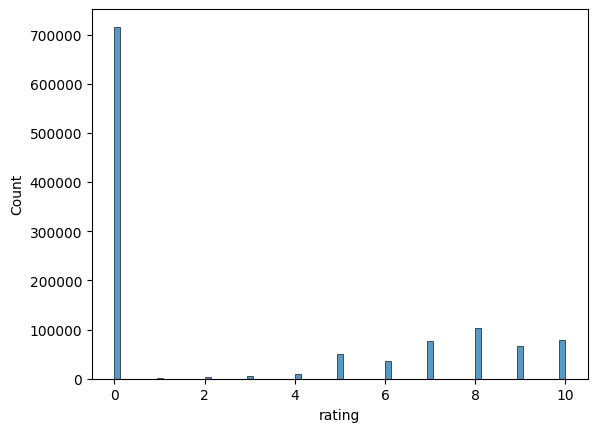

In [371]:
#histplot of ratings
sns.histplot(data= ratings_df, x= "rating")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [374]:
tweaked_users_df.head()

,id,age,country
0,1,34.75,usa
1,2,18.00,usa
2,3,34.75,russia
3,4,17.00,portugal
4,5,34.75,united kingdom


In [377]:
tweaked_users_df["age"].min()

0.0

In [ ]:
#geo map of users

<Axes: xlabel='age', ylabel='Count'>

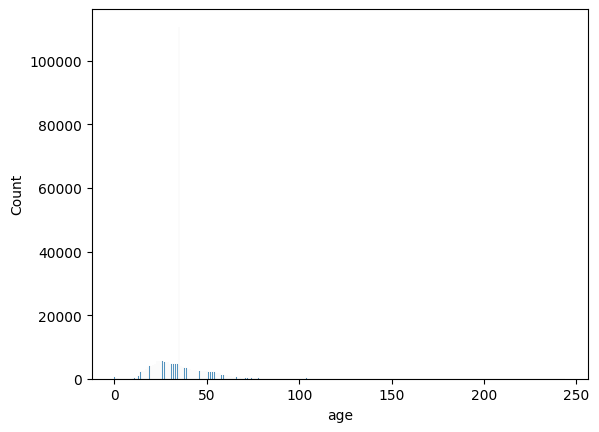

In [375]:
#age wise distribution of users
sns.histplot(data= tweaked_users_df, x= "age")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

### Popularity Based Recommendations

In [352]:
(
    pd.merge(tweaked_ratings_df, tweaked_books_df, how= "left", on= "isbn")
    .dropna()
    .groupby("title")
    .agg({"rating": np.mean, "id": "count"})
    .rename(columns= {"rating": "avg_rating", "id": "num_votes"})
    .query("num_votes>= 100")
    .sort_values("avg_rating", ascending= False)
    .reset_index()
).head()

,title,avg_rating,num_votes
0,Harry Potter And The Prisoner Of Azkaban,5.018868,212
1,Harry Potter And The Goblet Of Fire,4.944751,181
2,Harry Potter And The Order Of The Phoenix,4.632911,158
3,Harry Potter And The Chamber Of Secrets,4.507634,262
4,Harry Potter And The Sorcerer'S Stone,4.277628,371


$ \text{Weighted Rating (WR)} = \left( \frac{v}{v+m} \right) \cdot R + \left( \frac{m}{v+m} \right) \cdot C
 $  
 where,  
 v= num of votes,  
 m= min num of votes required to be listed in the Top 50,  
 R= mean movie rating,  
 C= mean vote across the whole report,  

In [ ]:
abc.min()